## Part 1: Binomial Distribution

Real-world Scenario: Call Center Employee Performance  
A call center agent answers 10 calls per day. From data, the chance of successfully solving an issue per call is 80% (p = 0.8).  
What is the probability that the agent solves exactly 8 calls?

- Trials (n): 10  
- Successes (k): 8  
- Probability of success (p): 0.8

We use the binomial distribution formula:  
$$ P(X = k) = C(n, k) \cdot p^k \cdot (1 - p)^{n - k} $$


In [1]:
def factorial(n):
    result = 1
    for i in range(2, n + 1):
        result *= i
    return result

def binomial_prob(n, k, p):
    comb = factorial(n) / (factorial(k) * factorial(n - k))
    return comb * (p ** k) * ((1 - p) ** (n - k))

# Call center case
n = 10  # calls per day
k = 8   # successful resolutions
p = 0.8 # probability of success

prob = binomial_prob(n, k, p)
print(f"Probability of solving exactly 8 calls out of 10: {prob:.4f}")


Probability of solving exactly 8 calls out of 10: 0.3020


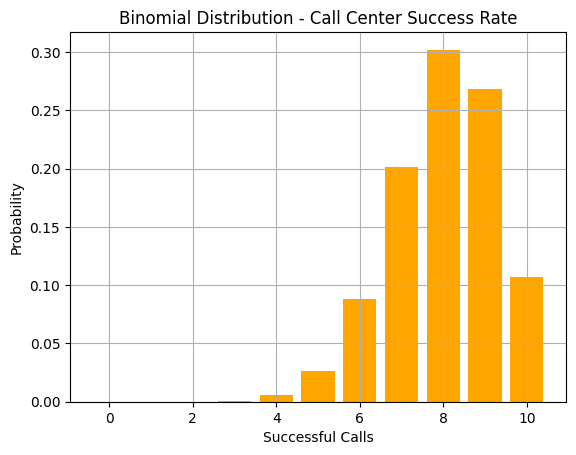

In [2]:
import matplotlib.pyplot as plt

k_values = list(range(n + 1))
probabilities = [binomial_prob(n, k, p) for k in k_values]

plt.bar(k_values, probabilities, color='orange')
plt.title("Binomial Distribution - Call Center Success Rate")
plt.xlabel("Successful Calls")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


## Part 2: Bayesian Probability (Exam Prediction Example)

Real-world Scenario: Predicting Exam Success

A school uses data to predict exam outcomes:
- 70% of students actually pass the exam  
- 90% of students who pass are predicted correctly (likelihood)  
- 20% of students who fail are wrongly predicted as likely to pass (false positive)  

We want to find:  
What is the probability that a student will pass, given that they were predicted as "likely to pass"?

We use Bayes’ Theorem:  
$$ P(Pass | Prediction) = \frac{P(Prediction | Pass) \cdot P(Pass)}{P(Prediction)} $$


In [3]:
# Given data
P_pass = 0.7
P_pred_given_pass = 0.9
P_pred_given_fail = 0.2
P_fail = 1 - P_pass

# Total prediction probability
P_pred = (P_pred_given_pass * P_pass) + (P_pred_given_fail * P_fail)

# Apply Bayes’ Theorem
P_pass_given_pred = (P_pred_given_pass * P_pass) / P_pred

print(f"Probability the student actually passes if predicted as likely to pass: {P_pass_given_pred:.4f}")


Probability the student actually passes if predicted as likely to pass: 0.9130


##  Part 4: Gradient Descent in Code
Objective: Convert manual gradient descent into Python code using SciPy, show step-by-step parameter updates, and visualize convergence.


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data points from Part 3
X = np.array([1, 3])
y = np.array([3, 6])

# Initial values
m = -1
b = 1
learning_rate = 0.1
iterations = 4  # 4 because you are 4 group members

# For tracking evolution
m_history = [m]
b_history = [b]
mse_history = []

print("Starting Gradient Descent:\n")

for i in range(iterations):
    # Step 1: Predict y using current m, b
    y_pred = m * X + b

    # Step 2: Compute Mean Squared Error
    mse = np.mean((y - y_pred) ** 2)
    mse_history.append(mse)

    # Step 3: Calculate gradients
    n = len(X)
    dm = -(2/n) * np.sum((y - y_pred) * X)
    db = -(2/n) * np.sum(y - y_pred)

    # Step 4: Update m and b
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # Track updates
    m_history.append(m)
    b_history.append(b)

    # Print each step clearly
    print(f"Iteration {i + 1}")
    print(f"Predictions: {y_pred}")
    print(f"MSE: {mse:.6f}")
    print(f"Gradients -> dm: {dm:.6f}, db: {db:.6f}")
    print(f"Updated m: {m:.6f}, Updated b: {b:.6f}")
    print("-" * 50)

# Final model
print(f"\nFinal Equation: y = {m:.3f}x + {b:.3f}")


Starting Gradient Descent:

Iteration 1
Predictions: [ 0 -2]
MSE: 36.500000
Gradients -> dm: -27.000000, db: -11.000000
Updated m: 1.700000, Updated b: 2.100000
--------------------------------------------------
Iteration 2
Predictions: [3.8 7.2]
MSE: 1.040000
Gradients -> dm: 4.400000, db: 2.000000
Updated m: 1.260000, Updated b: 1.900000
--------------------------------------------------
Iteration 3
Predictions: [3.16 5.68]
MSE: 0.064000
Gradients -> dm: -0.800000, db: -0.160000
Updated m: 1.340000, Updated b: 1.916000
--------------------------------------------------
Iteration 4
Predictions: [3.256 5.936]
MSE: 0.034816
Gradients -> dm: 0.064000, db: 0.192000
Updated m: 1.333600, Updated b: 1.896800
--------------------------------------------------

Final Equation: y = 1.334x + 1.897


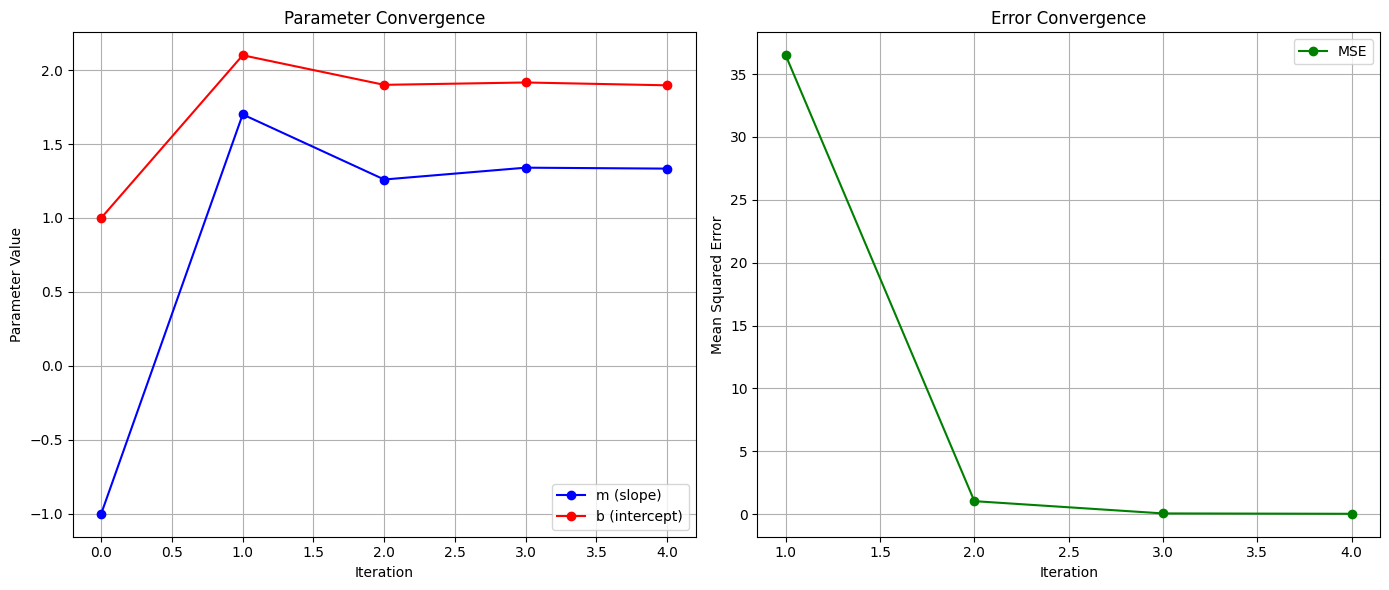

In [13]:
# Plot evolution of m and b
plt.figure(figsize=(14, 6))

# Plot 1: Parameter evolution
plt.subplot(1, 2, 1)
plt.plot(range(iterations + 1), m_history, 'bo-', label='m (slope)')
plt.plot(range(iterations + 1), b_history, 'ro-', label='b (intercept)')
plt.xlabel("Iteration")
plt.ylabel("Parameter Value")
plt.title("Parameter Convergence")
plt.legend()
plt.grid(True)

# Plot 2: Error evolution
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), mse_history, 'go-', label='MSE')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Error Convergence")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
